## Load libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os
import numpy as np
from custom_utils import transform_seeds, transform_loc, get_enc_region, get_real_region

sns.set_style("whitegrid")
sns.set_context("notebook")

## Load data

In [3]:
wregularseason = pd.read_csv("data/WRegularSeasonCompactResults.csv")
wregularseasondetailed = pd.read_csv("data/WRegularSeasonDetailedResults.csv")
wtourneyseason = pd.read_csv("data/WNCAATourneyCompactResults.csv")
wtourneyseasondetailed = pd.read_csv("data/WNCAATourneyDetailedResults.csv")
wteams = pd.read_csv("data/WTeams.csv")
wseeds = pd.read_csv("data/WNCAATourneySeeds.csv")
wseason = pd.read_csv("data/WSeasons.csv")

mregularseason = pd.read_csv("data/MRegularSeasonCompactResults.csv")
mregularseasondetailed = pd.read_csv("data/MRegularSeasonDetailedResults.csv")
mtourneyseason = pd.read_csv("data/MNCAATourneyCompactResults.csv")
mtourneyseasondetailed = pd.read_csv("data/MNCAATourneyDetailedResults.csv")
mteams = pd.read_csv("data/MTeams.csv")
mseeds = pd.read_csv("data/MNCAATourneySeeds.csv")
mseason = pd.read_csv("data/MSeasons.csv")

## Print all data

In [28]:
list_of_dirs = os.listdir("data")

for i, path in enumerate(list_of_dirs):
    try:
        df = pd.read_csv("data/" + path)
    except:
        df = pd.read_csv("data/" + path, encoding='cp1252')
    print("----------------------------------")
    print(f"No.{i} {path} - {df.shape}")
    display(df.head(3))


----------------------------------
No.0 Cities.csv - (502, 3)


,CityID,City,State
0,4001,Abilene,TX
1,4002,Akron,OH
2,4003,Albany,NY


----------------------------------
No.1 Conferences.csv - (51, 2)


,ConfAbbrev,Description
0,a_sun,Atlantic Sun Conference
1,a_ten,Atlantic 10 Conference
2,aac,American Athletic Conference


----------------------------------
No.2 MConferenceTourneyGames.csv - (6491, 5)


,Season,ConfAbbrev,DayNum,WTeamID,LTeamID
0,2001,a_sun,121,1194,1144
1,2001,a_sun,121,1416,1240
2,2001,a_sun,122,1209,1194


----------------------------------
No.3 MGameCities.csv - (84509, 6)


,Season,DayNum,WTeamID,LTeamID,CRType,CityID
0,2010,7,1143,1293,Regular,4027
1,2010,7,1314,1198,Regular,4061
2,2010,7,1326,1108,Regular,4080


----------------------------------
No.4 MMasseyOrdinals.csv - (5435396, 5)


,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12


----------------------------------
No.5 MNCAATourneyCompactResults.csv - (2518, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0


----------------------------------
No.6 MNCAATourneyDetailedResults.csv - (1382, 34)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18


----------------------------------
No.7 MNCAATourneySeedRoundSlots.csv - (776, 5)


,Seed,GameRound,GameSlot,EarlyDayNum,LateDayNum
0,W01,1,R1W1,136,137
1,W01,2,R2W1,138,139
2,W01,3,R3W1,143,144


----------------------------------
No.8 MNCAATourneySeeds.csv - (2558, 3)


,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228


----------------------------------
No.9 MNCAATourneySlots.csv - (2519, 4)


,Season,Slot,StrongSeed,WeakSeed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14


----------------------------------
No.10 MRegularSeasonCompactResults.csv - (190771, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0


----------------------------------
No.11 MRegularSeasonDetailedResults.csv - (116723, 34)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23


----------------------------------
No.12 MSeasons.csv - (41, 6)


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West


----------------------------------
No.13 MSecondaryTourneyCompactResults.csv - (1809, 9)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,SecondaryTourney
0,1985,136,1151,67,1155,65,H,0,NIT
1,1985,136,1153,77,1245,61,H,0,NIT
2,1985,136,1201,79,1365,76,H,0,NIT


----------------------------------
No.14 MSecondaryTourneyTeams.csv - (1836, 3)


,Season,SecondaryTourney,TeamID
0,1985,NIT,1108
1,1985,NIT,1133
2,1985,NIT,1139


----------------------------------
No.15 MTeamCoaches.csv - (13533, 5)


,Season,TeamID,FirstDayNum,LastDayNum,CoachName
0,1985,1102,0,154,reggie_minton
1,1985,1103,0,154,bob_huggins
2,1985,1104,0,154,wimp_sanderson


----------------------------------
No.16 MTeamConferences.csv - (13388, 3)


,Season,TeamID,ConfAbbrev
0,1985,1102,wac
1,1985,1103,ovc
2,1985,1104,sec


----------------------------------
No.17 MTeams.csv - (380, 4)


,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2025
1,1102,Air Force,1985,2025
2,1103,Akron,1985,2025


----------------------------------
No.18 MTeamSpellings.csv - (1177, 2)


,TeamNameSpelling,TeamID
0,a&m-corpus chris,1394
1,a&m-corpus christi,1394
2,abilene chr,1101


----------------------------------
No.19 SampleSubmissionStage1.csv - (507108, 2)


,ID,Pred
0,2021_1101_1102,0.5
1,2021_1101_1103,0.5
2,2021_1101_1104,0.5


----------------------------------
No.20 SeedBenchmarkStage1.csv - (507108, 2)


,ID,Pred
0,2021_1101_1102,0.50
1,2021_1101_1103,0.50
2,2021_1101_1104,0.14


----------------------------------
No.21 WConferenceTourneyGames.csv - (6113, 5)


,Season,ConfAbbrev,DayNum,WTeamID,LTeamID
0,2002,a_sun,129,3194,3144
1,2002,a_sun,129,3209,3407
2,2002,a_sun,129,3273,3125


----------------------------------
No.22 WGameCities.csv - (81342, 6)


,Season,DayNum,WTeamID,LTeamID,CRType,CityID
0,2010,11,3103,3237,Regular,4002
1,2010,11,3104,3399,Regular,4085
2,2010,11,3110,3224,Regular,4363


----------------------------------
No.23 WNCAATourneyCompactResults.csv - (1650, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,137,3104,94,3422,46,H,0
1,1998,137,3112,75,3365,63,H,0
2,1998,137,3163,93,3193,52,H,0


----------------------------------
No.24 WNCAATourneyDetailedResults.csv - (894, 34)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2010,138,3124,69,3201,55,N,0,28,57,...,34,3,5,17,19,12,18,4,1,18
1,2010,138,3173,67,3395,66,N,0,23,59,...,27,14,15,18,26,8,8,8,6,22
2,2010,138,3181,72,3214,37,H,0,26,57,...,15,3,8,10,21,4,16,6,4,20


----------------------------------
No.25 WNCAATourneySeeds.csv - (1676, 3)


,Season,Seed,TeamID
0,1998,W01,3330
1,1998,W02,3163
2,1998,W03,3112


----------------------------------
No.26 WNCAATourneySlots.csv - (1713, 4)


,Season,Slot,StrongSeed,WeakSeed
0,1998,R1W1,W01,W16
1,1998,R1W2,W02,W15
2,1998,R1W3,W03,W14


----------------------------------
No.27 WRegularSeasonCompactResults.csv - (134961, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,18,3104,91,3202,41,H,0
1,1998,18,3163,87,3221,76,H,0
2,1998,18,3222,66,3261,59,H,0


----------------------------------
No.28 WRegularSeasonDetailedResults.csv - (79639, 34)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2010,11,3103,63,3237,49,H,0,23,54,...,13,6,10,11,27,11,23,7,6,19
1,2010,11,3104,73,3399,68,N,0,26,62,...,21,14,27,14,26,7,20,4,2,27
2,2010,11,3110,71,3224,59,A,0,29,62,...,14,19,23,17,23,8,15,6,0,15


----------------------------------
No.29 WSeasons.csv - (28, 6)


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1998,10/27/1997,East,Midwest,Mideast,West
1,1999,10/26/1998,East,Mideast,Midwest,West
2,2000,11/01/1999,East,Midwest,Mideast,West


----------------------------------
No.30 WSecondaryTourneyCompactResults.csv - (828, 9)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,SecondaryTourney
0,2013,135,3120,80,3412,57,H,0,WNIT
1,2013,135,3140,69,3226,54,H,0,WNIT
2,2013,135,3158,72,3297,70,A,0,WBI


----------------------------------
No.31 WSecondaryTourneyTeams.csv - (824, 3)


,Season,SecondaryTourney,TeamID
0,2013,WBI,3125
1,2013,WBI,3158
2,2013,WBI,3178


----------------------------------
No.32 WTeamConferences.csv - (9490, 3)


,Season,TeamID,ConfAbbrev
0,1998,3102,wac
1,1998,3103,mac
2,1998,3104,sec


----------------------------------
No.33 WTeams.csv - (378, 2)


,TeamID,TeamName
0,3101,Abilene Chr
1,3102,Air Force
2,3103,Akron


----------------------------------
No.34 WTeamSpellings.csv - (1170, 2)


,TeamNameSpelling,TeamID
0,a&m-corpus chris,3394
1,a&m-corpus christi,3394
2,abilene chr,3101


## EDA

### Basic stats

In [43]:
print("Womens basic stats: ")
display(wregularseason.head())
display(wtourneyseason.head())
display(wseason.head())
display(wteams.head())
display(wseeds.head())

Womens basic stats: 


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,18,3104,91,3202,41,H,0
1,1998,18,3163,87,3221,76,H,0
2,1998,18,3222,66,3261,59,H,0
3,1998,18,3307,69,3365,62,H,0
4,1998,18,3349,115,3411,35,H,0


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,137,3104,94,3422,46,H,0
1,1998,137,3112,75,3365,63,H,0
2,1998,137,3163,93,3193,52,H,0
3,1998,137,3198,59,3266,45,H,0
4,1998,137,3203,74,3208,72,A,0


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1998,10/27/1997,East,Midwest,Mideast,West
1,1999,10/26/1998,East,Mideast,Midwest,West
2,2000,11/01/1999,East,Midwest,Mideast,West
3,2001,10/30/2000,East,Midwest,Mideast,West
4,2002,10/29/2001,East,West,Mideast,Midwest


,TeamID,TeamName
0,3101,Abilene Chr
1,3102,Air Force
2,3103,Akron
3,3104,Alabama
4,3105,Alabama A&M


,Season,Seed,TeamID
0,1998,W01,3330
1,1998,W02,3163
2,1998,W03,3112
3,1998,W04,3301
4,1998,W05,3272


In [42]:
print("Mens basic stats: ")
display(mregularseason.head())
display(mtourneyseason.head())
display(mseason.head())
display(mteams.head())
display(mseeds.head())

Mens basic stats: 


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/02/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2025
1,1102,Air Force,1985,2025
2,1103,Akron,1985,2025
3,1104,Alabama,1985,2025
4,1105,Alabama A&M,2000,2025


,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


This basic stats describe important aspects of our data like games result in regular and tourney phase of season. Also we can get the tourney seed and when particular team access Division I. Also we can address an apprioriate regions for particular seasons and calucate game's dates.

In [39]:
display(wregularseason.describe())
display(wtourneyseason.describe())

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT
count,134961.000000,134961.000000,134961.000000,134961.000000,134961.000000,134961.000000,134961.000000
mean,2011.763880,70.567912,3285.006632,71.926134,3285.377983,57.513467,0.039619
std,7.830872,35.357955,104.049880,11.377089,105.541043,10.798511,0.227763
min,1998.000000,0.000000,3101.000000,30.000000,3101.000000,11.000000,0.000000
25%,2005.000000,39.000000,3196.000000,64.000000,3193.000000,50.000000,0.000000
50%,2012.000000,73.000000,3282.000000,71.000000,3285.000000,57.000000,0.000000
75%,2018.000000,101.000000,3377.000000,79.000000,3376.000000,64.000000,0.000000
max,2025.000000,132.000000,3480.000000,140.000000,3480.000000,130.000000,5.000000


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000
mean,2010.743636,140.680000,3285.878788,75.750303,3287.456364,59.164848,0.024242
std,7.776383,4.044855,97.116198,11.331146,99.845312,10.990518,0.165250
min,1998.000000,135.000000,3104.000000,47.000000,3101.000000,21.000000,0.000000
25%,2004.000000,138.000000,3200.000000,68.000000,3208.000000,52.000000,0.000000
50%,2011.000000,139.000000,3280.000000,75.000000,3281.000000,59.000000,0.000000
75%,2017.000000,141.000000,3376.000000,83.000000,3377.000000,67.000000,0.000000
max,2024.000000,155.000000,3464.000000,140.000000,3465.000000,100.000000,2.000000


Women's data was started gathering in 1998, we can see that the ID's of Women's teams, are in the different range than men's.

In [45]:
display(mtourneyseason.describe())
display(mregularseason.describe())

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,2004.374106,139.150913,1284.984114,76.867355,1291.419778,65.077442,0.066720
std,11.447616,4.218254,101.039491,11.768184,103.424835,11.043525,0.278191
min,1985.000000,134.000000,1101.000000,43.000000,1101.000000,29.000000,0.000000
25%,1994.250000,136.000000,1207.000000,69.000000,1209.000000,58.000000,0.000000
50%,2004.000000,137.000000,1276.000000,76.000000,1286.500000,64.000000,0.000000
75%,2014.000000,139.000000,1385.000000,84.000000,1387.000000,72.000000,0.000000
max,2024.000000,154.000000,1463.000000,149.000000,1463.000000,115.000000,3.000000


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT
count,190771.000000,190771.000000,190771.000000,190771.000000,190771.000000,190771.000000,190771.000000
mean,2006.170629,73.483690,1287.589455,76.849112,1283.285961,64.757253,0.048812
std,11.573526,34.280004,104.888255,11.843356,105.085653,11.206328,0.258660
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000
25%,1996.000000,44.000000,1199.000000,69.000000,1191.000000,57.000000,0.000000
50%,2007.000000,75.000000,1285.000000,76.000000,1281.000000,64.000000,0.000000
75%,2016.000000,103.000000,1380.000000,84.000000,1375.000000,72.000000,0.000000
max,2025.000000,132.000000,1480.000000,186.000000,1480.000000,150.000000,6.000000


Mens data was started gathering in 1985, so we have more data than from Women's games. Men's also shoot more points and of course theirs ID's are in the different range.

### Do years impact scored points in games?

In [4]:
wregulargrouped = wregularseason.groupby("Season").agg({
    "WScore": ["mean", "median", "std"],
    "LScore": ["mean", "median", "std"]
})

wtourneygrouped = wtourneyseason.groupby("Season").agg({
    "WScore": ["mean", "median", "std"],
    "LScore": ["mean", "median", "std"]
})

pd.concat([wregulargrouped, wtourneygrouped], axis=1)

WScore                       LScore                       WScore  \
             mean median        std       mean median        std       mean   
Season                                                                        
1998    75.324457   75.0  11.423980  60.342037   60.0  10.644483  78.587302   
1999    74.747577   74.0  11.546170  60.192390   60.0  10.438737  76.444444   
2000    74.013339   73.0  11.166134  59.191047   59.0  10.580351  78.031746   
2001    74.269319   74.0  11.283823  59.652263   59.0  10.604031  79.444444   
2002    73.595371   73.0  11.057632  58.876920   59.0  10.705885  76.507937   
2003    72.299628   72.0  10.911630  57.940906   58.0  10.415430  72.507937   
2004    71.206491   71.0  10.752699  57.316707   57.0  10.125052  72.285714   
2005    69.858742   69.0  10.709077  55.830534   56.0  10.324893  73.126984   
2006    71.175834   71.0  10.586922  57.262901   57.0  10.183976  75.857143   
2007    71.132450   71.0  10.649092  57.063416   57.0  10.370998  71.888889   
2008    70.996062   70.0  10.773400  56.806458   56.0  10.434616  73.507937   
2009    69.819350   69.0  10.859342  55.919603   56.0  10.364331  73.936508   
2010    70.514786   70.0  11.080310  56.473152   56.0  10.789259  73.111111   
2011    70.658817   70.0  11.495671  56.193071   56.0  10.840038  73.873016   
2012    69.183809   68.0  11.108934  55.117129   55.0  10.587429  73.888889   
2013    68.843750   68.0  10.999179  54.801890   54.0  10.652687  74.476190   
2014    74.491051   74.0  11.840531  60.300838   60.0  11.507366  77.079365   
2015    71.312044   71.0  11.419871  57.314730   57.0  10.975502  76.841270   
2016    71.410635   70.0  11.629593  57.040315   56.0  11.255324  77.111111   
2017    72.100768   71.0  11.384484  57.486756   57.0  10.892955  79.984127   
2018    72.774237   72.0  11.785791  57.954502   58.0  11.080891  82.460317   
2019    72.303817   72.0  11.643888  57.605916   57.0  10.953956  78.428571   
2020    72.055502   71.0  11.348455  57.686714   57.0  10.730770        NaN   
2021    72.699663   72.0  11.581415  58.503656   58.0  11.078431  74.476190   
2022    71.277273   70.0  11.170744  56.967984   57.0  10.537678  74.298507   
2023    72.159844   71.0  11.298265  57.650540   57.0  10.983616  75.432836   
2024    72.582379   72.0  11.750459  57.598448   57.0  10.771899  76.014925   
2025    73.734519   73.0  12.016538  57.098370   57.0  10.620318        NaN   

                             LScore                    
       median        std       mean median        std  
Season                                                 
1998     77.0  10.052499  63.396825   64.0   8.612706  
1999     76.0  10.902468  60.650794   61.0  10.429732  
2000     77.0  11.987854  61.634921   63.0  11.093883  
2001     79.0  10.607024  61.365079   63.0  10.846884  
2002     76.0  10.177256  59.111111   60.0   9.427330  
2003     72.0  10.155045  57.015873   57.0  10.231974  
2004     71.0  10.791915  57.952381   58.0  10.016806  
2005     71.0  10.195654  56.126984   57.0   9.877462  
2006     75.0   9.124333  59.920635   61.0   9.482244  
2007     70.0  12.100535  54.730159   54.0  11.228142  
2008     75.0  11.480521  57.555556   57.0  10.124671  
2009     74.0   9.964247  56.619048   58.0  10.618652  
2010     73.0  11.262428  56.650794   57.0  11.796881  
2011     75.0  10.216198  58.349206   60.0  12.437144  
2012     73.0   8.443572  58.095238   59.0  11.385778  
2013     74.0  10.625376  58.047619   57.0  11.172300  
2014     76.0  11.325537  59.571429   60.0  10.405821  
2015     77.0  12.188316  61.682540   64.0  11.649208  
2016     75.0  11.243796  58.587302   58.0  11.139345  
2017     77.0  14.110728  60.746032   62.0  11.001420  
2018     83.0  12.697251  62.841270   63.0  11.610905  
2019     78.0  11.564286  61.920635   62.0  11.888327  
2020      NaN        NaN        NaN    NaN        NaN  
2021     73.0  11.851034  57.253968   59.0  10.738787  
2022     74.0  12.661101  58.059701   58.0  11.83

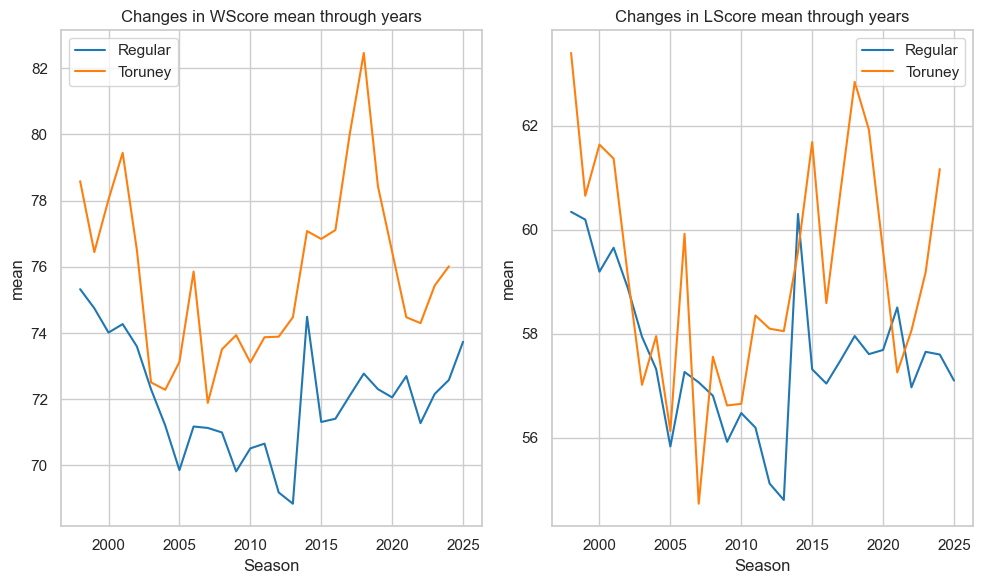

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

regularplot = sns.lineplot(wregulargrouped["WScore"]["mean"], label="Regular", ax=axs[0])
tourneyplot = sns.lineplot(wtourneygrouped["WScore"]["mean"], label="Toruney", ax=axs[0])
axs[0].set_title("Changes in WScore mean through years")

sns.lineplot(wregulargrouped["LScore"]["mean"], label="Regular", ax=axs[1])
sns.lineplot(wtourneygrouped["LScore"]["mean"], label="Toruney", ax=axs[1])
axs[1].set_title("Changes in LScore mean through years")

plt.tight_layout()
plt.show()


We can see probably some trends. From 1998 the number of scored points was going down, then was some plateu and a little bit rising up till 2025. Also we can see, number of scored points in tourney phase is bigger (in tourney phase teams dont calculate and do everything to win, in season you have a lot of games, so you can have some strategy). Rolling average tells us information about changes in data, as I said before, values are going down till 2005/2006, then plateu and on the end going a little up.

In [35]:
wregularmovinggrouped = wregulargrouped[["WScore", "LScore"]].rolling(window=3).mean()
wtourneymovinggrouped = wtourneygrouped[["WScore", "LScore"]].rolling(window=3).mean()

pd.concat([wregularmovinggrouped, wtourneymovinggrouped], axis=1)

WScore                           LScore                        \
             mean     median        std       mean     median        std   
Season                                                                     
1998          NaN        NaN        NaN        NaN        NaN        NaN   
1999          NaN        NaN        NaN        NaN        NaN        NaN   
2000    74.695125  74.000000  11.378761  59.908491  59.666667  10.554523   
2001    74.343412  73.666667  11.332042  59.678567  59.333333  10.541040   
2002    73.959343  73.333333  11.169196  59.240077  59.000000  10.630089   
2003    73.388106  73.000000  11.084362  58.823363  58.666667  10.575115   
2004    72.367163  72.000000  10.907320  58.044844  58.000000  10.415455   
2005    71.121620  70.666667  10.791135  57.029382  57.000000  10.288458   
2006    70.747022  70.333333  10.682899  56.803380  56.666667  10.211307   
2007    70.722342  70.333333  10.648364  56.718950  56.666667  10.293289   
2008    71.101449  70.666667  10.669805  57.044258  56.666667  10.329863   
2009    70.649287  70.000000  10.760611  56.596492  56.333333  10.389981   
2010    70.443399  69.666667  10.904351  56.399738  56.000000  10.529402   
2011    70.330984  69.666667  11.145108  56.195275  56.000000  10.664543   
2012    70.119137  69.333333  11.228305  55.927784  55.666667  10.738909   
2013    69.562125  68.666667  11.201262  55.370697  55.000000  10.693385   
2014    70.839537  70.000000  11.316215  56.739953  56.333333  10.915828   
2015    71.548949  71.000000  11.419860  57.472486  57.000000  11.045185   
2016    72.404577  71.666667  11.629998  58.218627  57.666667  11.246064   
2017    71.607816  70.666667  11.477983  57.280600  56.666667  11.041260   
2018    72.095213  71.000000  11.599956  57.493858  57.000000  11.076390   
2019    72.392940  71.666667  11.604721  57.682391  57.333333  10.975934   
2020    72.377852  71.666667  11.592711  57.749044  57.333333  10.921872   
2021    72.352994  71.666667  11.524586  57.932095  57.333333  10.921052   
2022    72.010812  71.000000  11.366872  57.719451  57.333333  10.782293   
2023    72.045593  71.000000  11.350142  57.707393  57.333333  10.866575   
2024    72.006498  71.000000  11.406490  57.405657  57.000000  10.764398   
2025    72.825580  72.000000  11.688421  57.449119  57.000000  10.791944   

           WScore                           LScore                        
             mean     median        std       mean     median        std  
Season                                                                    
1998          NaN        NaN        NaN        NaN        NaN        NaN  
1999          NaN        NaN        NaN        NaN        NaN        NaN  
2000    77.687831  76.666667  10.980940  61.894180  62.666667  10.045440  
2001    77.973545  77.333333  11.165782  61.216931  62.333333  10.790166  
2002    77.994709  77.333333  10.924045  60.703704  62.000000  10.456032  
2003    76.153439  75.666667  10.313108  59.164021  60.000000  10.168729  
2004    73.767196  73.000000  10.374739  58.026455  58.333333   9.892037  
2005    72.640212  71.333333  10.380871  57.031746  57.333333  10.042081  
2006    73.756614  72.333333  10.037301  58.000000  58.666667   9.792171  
2007    73.624339  72.000000  10.473507  56.925926  57.333333  10.195949  
2008    73.751323  73.333333  10.901796  57.402116  57.333333  10.278352  
2009    73.111111  73.000000  11.181768  56.301587  56.333333  10.657155  
2010    73.518519  74.000000  10.902399  56.941799  57.333333  10.846735  
2011    73.640212  74.000000  10.480958  57.206349  58.333333  11.617559  
2012    73.624339  73.666667   9.974066  57.698413  58.666667  11.873268  
2013    74.079365  74.000000   9.761716  58.164021  58.666667  11.665074  
2014    75.148148  74.333333  10.131495  58.571429  58.666667  10.987966  
2015    76.132275  75.666667  11.379743  59.767196  60.333333  11.075776  
2016    77.010582  76.000000  11.585883  59.947090  60.666667  11.064791  
2017

In [40]:
mregulargrouped = mregularseason.groupby("Season").agg({
    "WScore": ["mean", "median", "std"],
    "LScore": ["mean", "median", "std"]
})

mtourneygrouped = mtourneyseason.groupby("Season").agg({
    "WScore": ["mean", "median", "std"],
    "LScore": ["mean", "median", "std"]
})

pd.concat([mregulargrouped, mtourneygrouped], axis=1)

WScore                       LScore                       WScore  \
             mean median        std       mean median        std       mean   
Season                                                                        
1985    74.723040   74.0  12.279929  63.860316   64.0  10.495628  68.047619   
1986    74.813640   74.0  12.441100  63.633888   63.0  10.541424  76.841270   
1987    77.993870   77.0  12.785701  66.770626   66.0  11.390096  82.603175   
1988    79.773704   79.0  13.784530  67.697092   67.0  11.958822  83.349206   
1989    81.728511   81.0  13.968892  69.530840   69.0  12.422559  85.222222   
1990    80.846477   80.0  14.273103  68.833622   68.0  12.569874  80.761905   
1991    82.733932   82.0  14.512247  70.057240   69.0  12.588671  80.079365   
1992    79.992004   79.0  13.169048  67.144657   67.0  11.906432  81.238095   
1993    79.508790   79.0  12.849106  67.301858   67.0  11.476209  81.761905   
1994    81.160345   80.0  12.470064  68.561330   68.0  11.489551  78.349206   
1995    80.096149   79.0  12.421079  67.394898   67.0  11.278505  78.222222   
1996    78.205483   77.0  12.420218  65.737506   65.0  11.149923  77.666667   
1997    76.300842   76.0  11.696079  63.742238   63.0  10.975735  77.428571   
1998    77.229902   76.0  12.120373  64.612911   64.0  10.879590  78.492063   
1999    76.043581   75.0  11.770348  63.427996   63.0  10.901723  74.666667   
2000    76.310467   76.0  11.698093  63.870768   63.0  11.023161  73.222222   
2001    77.088650   77.0  11.754475  64.833221   64.0  10.791170  77.468750   
2002    76.963557   76.0  11.827890  64.614270   64.0  11.187676  79.625000   
2003    75.795061   75.0  11.085682  63.756932   63.0  10.723545  76.562500   
2004    74.971122   75.0  11.060824  62.990155   63.0  10.706759  75.500000   
2005    74.693690   74.0  11.056294  62.635294   62.0  10.536965  75.562500   
2006    74.587555   74.0  11.007689  62.666597   62.0  10.824574  73.203125   
2007    74.829467   74.0  11.482489  62.761650   63.0  11.404324  75.703125   
2008    74.962425   74.0  11.343503  62.755375   62.0  11.243062  77.218750   
2009    74.033721   73.0  11.153610  61.980377   62.0  10.968453  77.250000   
2010    74.652480   74.0  11.189425  62.484325   62.0  10.771445  74.031250   
2011    74.374190   74.0  10.776952  62.470644   62.0  10.489370  73.194030   
2012    73.379973   73.0  10.679606  61.415953   61.0  10.544254  71.402985   
2013    72.840789   72.0  10.709447  60.908083   61.0  10.518661  72.208955   
2014    76.101268   75.0  10.720004  64.452070   64.0  10.793479  73.850746   
2015    72.680799   72.0  10.550542  61.007845   61.0  10.526986  72.925373   
2016    78.295958   78.0  10.836792  66.327063   66.0  10.894475  78.343284   
2017    78.645783   78.0  11.084819  66.615199   66.0  11.062746  79.432836   
2018    79.080296   79.0  10.930396  66.919149   66.0  10.915408  76.253731   
2019    77.887424   77.0  10.693970  65.790591   66.0  10.736197  76.358209   
2020    76.177928   76.0  10.547606  64.230105   64.0  10.341802        NaN   
2021    76.808301   76.0  10.516196  64.807004   65.0  10.284112  75.363636   
2022    75.920112   75.0  10.337791  64.170627   64.0  10.251446  74.850746   
2023    76.618886   76.0  10.362001  64.871831   65.0  10.248336  75.194030   
2024    78.645086   78.0  10.385967  66.572677   66.0  10.327133  79.731343   
2025    79.330557   79.0  10.639324  66.304710   66.0  10.601904        NaN   

                             LScore                    
       median        std       mean median        std  
Season                                                 
1985     67.0  10.448690  59.333333   58.0   9.425429  
1986     74.0  10.297520  66.142857   65.0   9.777949  
1987     83.0  13.688398  71.984127   71.0  11.641821  
1988     83.0  15.202036  71.285714   72.0  14.212022  
1989     85.0  13.236612  73.253968   73.0  11.550685  
1990     78.0  16.390117  70.761905   70.0  13.490396  
1991     79.0  12.730838  67.8

In [49]:
mregularmovinggrouped = mregulargrouped[["WScore", "LScore"]].rolling(window=3).mean()
mtourneymovinggrouped = mtourneygrouped[["WScore", "LScore"]].rolling(window=3).mean()

pd.concat([mregularmovinggrouped, mtourneymovinggrouped], axis=1)

WScore                           LScore                        \
             mean     median        std       mean     median        std   
Season                                                                     
1985          NaN        NaN        NaN        NaN        NaN        NaN   
1986          NaN        NaN        NaN        NaN        NaN        NaN   
1987    75.843517  75.000000  12.502244  64.754943  64.333333  10.809049   
1988    77.527071  76.666667  13.003777  66.033869  65.333333  11.296781   
1989    79.832028  79.000000  13.513041  67.999519  67.333333  11.923826   
1990    80.782898  80.000000  14.008842  68.687185  68.000000  12.317085   
1991    81.769640  81.000000  14.251414  69.473900  68.666667  12.527035   
1992    81.190804  80.333333  13.984800  68.678506  68.000000  12.354992   
1993    80.744908  80.000000  13.510134  68.167918  67.666667  11.990438   
1994    80.220379  79.333333  12.829406  67.669282  67.333333  11.624064   
1995    80.255095  79.333333  12.580083  67.752696  67.333333  11.414755   
1996    79.820659  78.666667  12.437120  67.231245  66.666667  11.305993   
1997    78.200825  77.333333  12.179125  65.624881  65.000000  11.134721   
1998    77.245409  76.333333  12.078890  64.697552  64.000000  11.001750   
1999    76.524775  75.666667  11.862267  63.927715  63.333333  10.919016   
2000    76.527983  75.666667  11.862938  63.970558  63.333333  10.934825   
2001    76.480899  76.000000  11.740972  64.043995  63.333333  10.905351   
2002    76.787558  76.333333  11.760153  64.439420  63.666667  11.000669   
2003    76.615756  76.000000  11.556016  64.401475  63.666667  10.900797   
2004    75.909913  75.333333  11.324799  63.787119  63.333333  10.872660   
2005    75.153291  74.666667  11.067600  63.127461  62.666667  10.655757   
2006    74.750789  74.333333  11.041602  62.764015  62.333333  10.689433   
2007    74.703571  74.000000  11.182157  62.687847  62.333333  10.921955   
2008    74.793149  74.000000  11.277894  62.727874  62.333333  11.157320   
2009    74.608537  73.666667  11.326534  62.499134  62.333333  11.205280   
2010    74.549542  73.666667  11.228846  62.406692  62.000000  10.994320   
2011    74.353463  73.666667  11.039996  62.311782  62.000000  10.743089   
2012    74.135548  73.666667  10.881995  62.123641  61.666667  10.601690   
2013    73.531651  73.000000  10.722002  61.598227  61.333333  10.517428   
2014    74.107344  73.333333  10.703019  62.258702  62.000000  10.618798   
2015    73.874286  73.000000  10.659998  62.122666  62.000000  10.613042   
2016    75.692675  75.000000  10.702446  63.928992  63.666667  10.738313   
2017    76.540847  76.000000  10.824051  64.650036  64.333333  10.828069   
2018    78.674012  78.333333  10.950669  66.620470  66.000000  10.957543   
2019    78.537835  78.000000  10.903062  66.441646  66.000000  10.904783   
2020    77.715216  77.333333  10.723991  65.646615  65.333333  10.664469   
2021    76.957884  76.333333  10.585924  64.942567  65.000000  10.454037   
2022    76.302114  75.666667  10.467198  64.402579  64.333333  10.292453   
2023    76.449100  75.666667  10.405329  64.616487  64.666667  10.261298   
2024    77.061362  76.333333  10.361920  65.205045  65.000000  10.275638   
2025    78.198177  77.666667  10.462430  65.916406  65.666667  10.392458   

           WScore                           LScore                        
             mean     median        std       mean     median        std  
Season                                                                    
1985          NaN        NaN        NaN        NaN        NaN        NaN  
1986          NaN        NaN        NaN        NaN        NaN        NaN  
1987    75.830688  74.666667  11.478203  65.820106  64.666667  10.281733  
1988    80.931217  80.000000  13.062651  69.804233  69.333333  11.877264  
1989    83.724868  83.666667  14.042349  72.174603  72.000000  12.468176  
1990    83.111111  82.000000  14.942922  71.767196  71.666667  13.

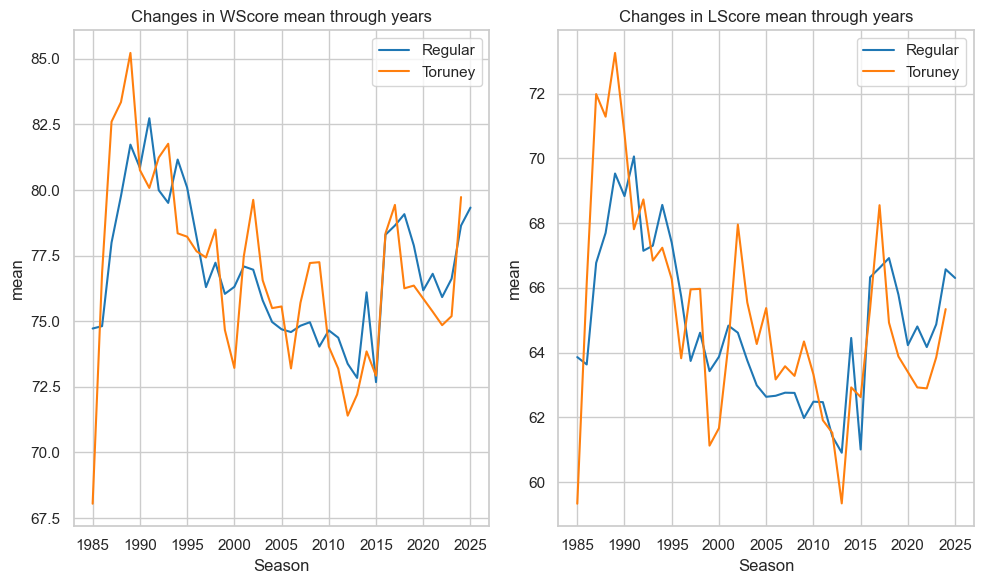

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

sns.lineplot(mregulargrouped["WScore"]["mean"], label="Regular", ax=axs[0])
sns.lineplot(mtourneygrouped["WScore"]["mean"], label="Toruney", ax=axs[0])
axs[0].set_title("Changes in WScore mean through years")

sns.lineplot(mregulargrouped["LScore"]["mean"], label="Regular", ax=axs[1])
sns.lineplot(mtourneygrouped["LScore"]["mean"], label="Toruney", ax=axs[1])
axs[1].set_title("Changes in LScore mean through years")

plt.tight_layout()
plt.show()

In Men's data the number of scored points is ascent to 1991, then is going down. I also think that in the tourney phase men's majority means are smaller than in regular season. It is kind of curios finding, in contrary to women.

### How long Men's teams are in Division I?

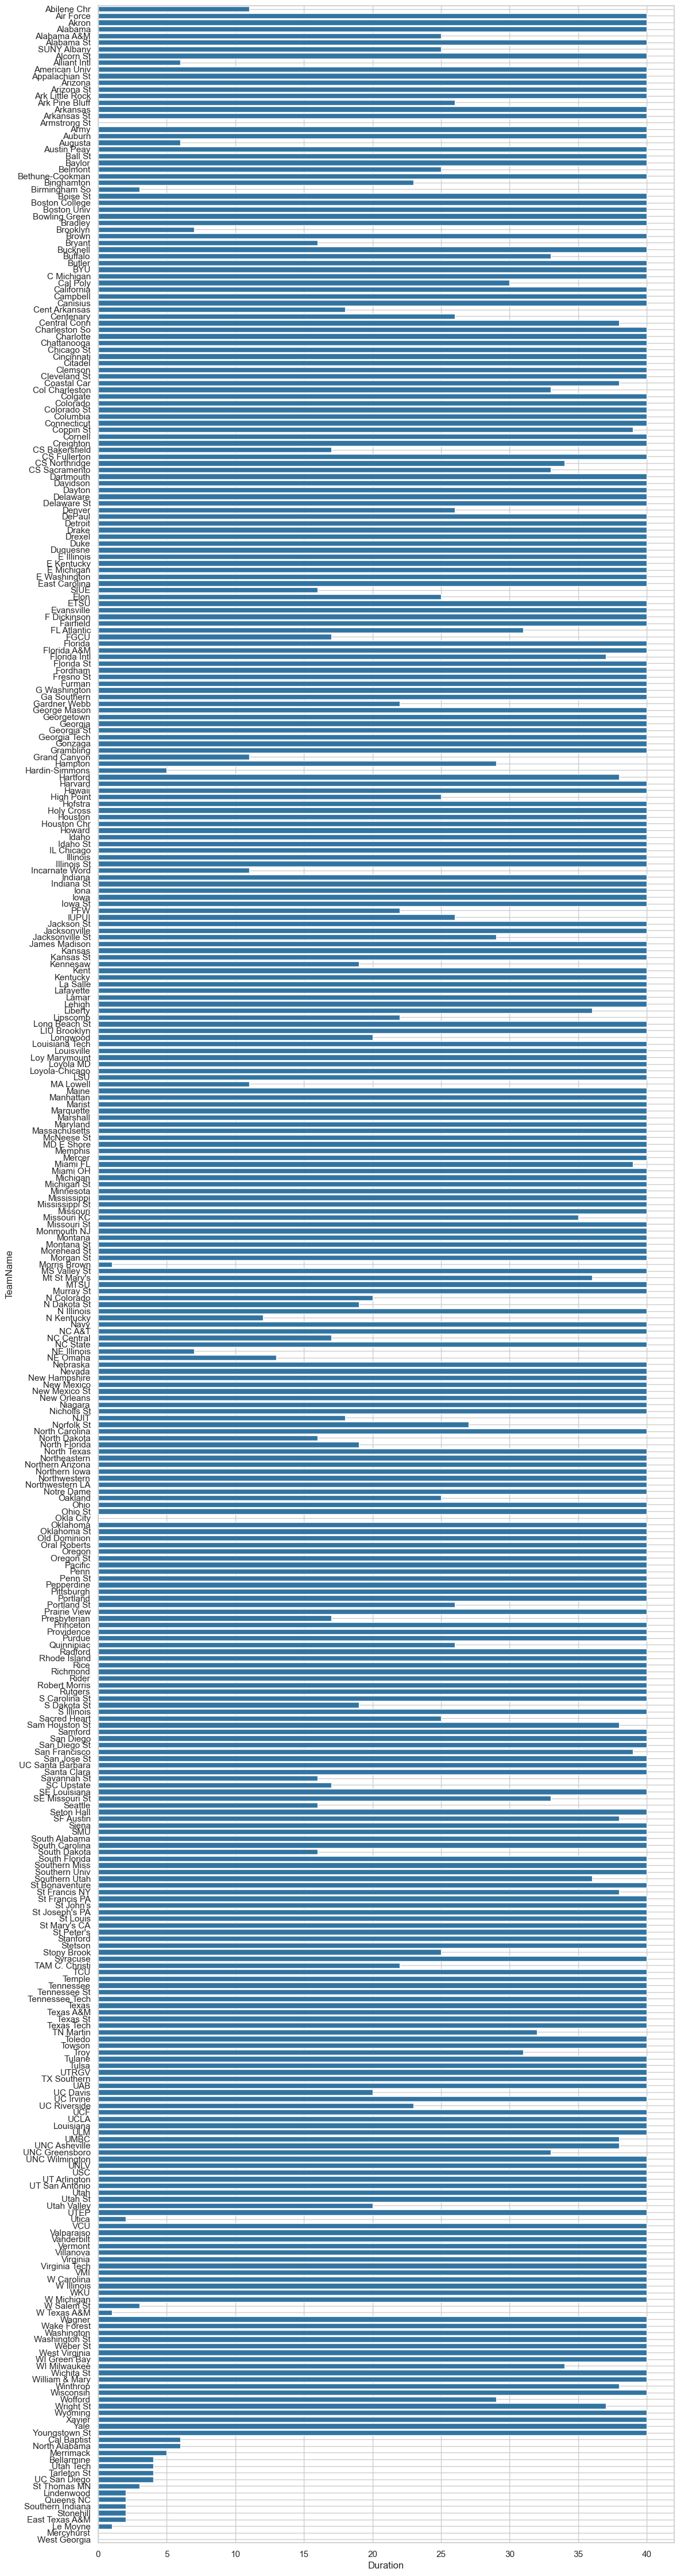

In [37]:
mteams["Duration"] = mteams["LastD1Season"] - mteams["FirstD1Season"]

plt.figure(figsize=(12, 45))
sns.barplot(data=mteams, x="Duration", y="TeamName")
plt.grid(True)
plt.tight_layout()
plt.show()

As we can see, it is a lot of teams, and also a lot of teams are really long in Division I. I will calcualate duration stats and how many teams are all time in Division I.

In [38]:
mteams["Duration"].describe()

count    380.000000
mean      34.334211
std       11.187601
min        0.000000
25%       37.000000
50%       40.000000
75%       40.000000
max       40.000000
Name: Duration, dtype: float64

In [39]:
print(f"All time Division I teams: {len(mteams[mteams.Duration == 40])}")

All time Division I teams: 272


### Should we care where teams play?

In [50]:
wregularseason.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,18,3104,91,3202,41,H,0
1,1998,18,3163,87,3221,76,H,0
2,1998,18,3222,66,3261,59,H,0
3,1998,18,3307,69,3365,62,H,0
4,1998,18,3349,115,3411,35,H,0


In [56]:
display(wregularseason.groupby(["Season", "WLoc"]).agg({
    "WTeamID" : ["count"]
}).T)

display(wtourneyseason.groupby(["Season", "WLoc"]).agg({
    "WTeamID" : ["count"]
}).T)

Season         1998        1999           2000             2001        ...  \
WLoc              A     H     A     H  N     A     H    N     A     H  ...   
WTeamID count  1455  2413  1610  2616  5  1611  2570  242  1646  2728  ...   

Season        2022  2023             2024             2025             
WLoc             N     A     H    N     A     H    N     A     H    N  
WTeamID count  447  1934  3031  409  1944  2962  508  1140  1960  275  

[1 rows x 82 columns]

Season        1998        1999     2000         2001      ... 2021 2022      \
WLoc             A   H  N    H   N    A   H   N    A   H  ...    N    A   H   
WTeamID count   17  45  1   32  31   11  37  15   15  48  ...   63    5  28   

Season            2023         2024          
WLoc            N    A   H   N    A   H   N  
WTeamID count  34    4  30  33    7  36  24  

[1 rows x 72 columns]

In [57]:
display(mregularseason.groupby(["Season", "WLoc"]).agg({
    "WTeamID" : ["count"]
}).T)

display(mtourneyseason.groupby(["Season", "WLoc"]).agg({
    "WTeamID" : ["count"]
}).T)

Season         1985             1986             1987             1988  ...  \
WLoc              A     H    N     A     H    N     A     H    N     A  ...   
WTeamID count  1114  2244  379  1110  2283  390  1190  2298  427  1181  ...   

Season        2022  2023             2024             2025             
WLoc             N     A     H    N     A     H    N     A     H    N  
WTeamID count  583  1736  3194  672  1740  3230  637  1013  2090  379  

[1 rows x 123 columns]

,Season,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2014,2015,2016,2017,2018,2019,2021,2022,2023,2024
,WLoc,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
WTeamID,count,63,63,63,63,63,63,63,63,63,63,...,67,67,67,67,67,67,66,67,67,67


Teams have better result when plays at Home. It's kind of obvious, you have trainig on that field and you more familiar with your own field. So we can see that this column can be important. But in Men's tourney phase, they only play in neutral fields

### Which teams received the best seed most often?

In [121]:
display(wteams.head(5))
display(wseeds.head(5))

,TeamID,TeamName
0,3101,Abilene Chr
1,3102,Air Force
2,3103,Akron
3,3104,Alabama
4,3105,Alabama A&M


,Season,Seed,TeamID,ISeed,RegionEnc,DayZero,RegionName
0,1998,W01,3330,1,W,10/27/1997,East
1,1998,W02,3163,2,W,10/27/1997,East
2,1998,W03,3112,3,W,10/27/1997,East
3,1998,W04,3301,4,W,10/27/1997,East
4,1998,W05,3272,5,W,10/27/1997,East


In [ ]:
wseeds["ISeed"]= wseeds.apply(transform_seeds, axis=1)
wseeds["RegionEnc"]= wseeds.apply(get_enc_region, axis=1)
wseeds = pd.merge(wseeds, wseason, on="Season", how="left")
wseeds["RegionName"] = wseeds.apply(get_real_region, axis=1)
wseeds.drop(["RegionW", "RegionX", "RegionY", "RegionZ"], axis=1, inplace=True)
wseedext = pd.merge(wseeds, wteams, how="left", on="TeamID")

In [126]:
wseedsgrouped = wseedext.groupby(["ISeed", "TeamName"]).agg({
    "Season" : "count"
}).sort_values(["ISeed","Season"], ascending=[True, False]).rename(columns= {'Season':'Count'})
wseedsgrouped.groupby("ISeed").head(3)

Count
ISeed TeamName             
1     Connecticut        18
      Tennessee          12
      Notre Dame          9
2     Duke                9
      Stanford            9
      Baylor              8
3     UCLA                6
      Florida St          5
      Georgia             5
4     Purdue              6
      North Carolina      5
      Iowa St             4
5     Michigan St         4
      NC State            4
      Notre Dame          4
6     LSU                 5
      Oklahoma            5
      Colorado            4
7     Iowa St             6
      DePaul              4
      G Washington        4
8     Michigan            4
      Syracuse            4
      California          3
9     Iowa                5
      Michigan St         4
      Purdue              4
10    DePaul              3
      Georgia Tech        3
      Marquette           3
11    BYU                 4
      Gonzaga             4
      Princeton           4
12    Chattanooga         6
      FGCU                6
      MTSU                4
13    Liberty             6
      Belmont             3
      Chattanooga         3
14    Liberty             6
      American Univ       3
      Dartmouth           3
15    Hampton             4
      Holy Cross          3
      Oral Roberts        3
16    Prairie View        6
      Southern Univ       5
      Robert Morris       4

In [146]:
mseeds["ISeed"]= mseeds.apply(transform_seeds, axis=1)
mseeds["RegionEnc"]= mseeds.apply(get_enc_region, axis=1)
mseeds = pd.merge(mseeds, mseason, on="Season", how="left")
mseeds["RegionName"] = mseeds.apply(get_real_region, axis=1)
mseeds.drop(["RegionW", "RegionX", "RegionY", "RegionZ"], axis=1, inplace=True)
mseedext = pd.merge(mseeds, mteams, how="left", on="TeamID")

In [148]:
mgroupedseeds = mseedext.groupby(["ISeed", "TeamName"]).agg({
    "Season" : "count"
}).sort_values(["ISeed","Season"], ascending=[True, False]).rename(columns= {'Season':'Count'})

mgroupedseeds.groupby("ISeed").head(3)

Count
ISeed TeamName             
1     Kansas             16
      North Carolina     15
      Duke               14
2     Duke               12
      Arizona             9
      Kentucky            8
3     Baylor              6
      Michigan            6
      Duke                5
4     Louisville          9
      Illinois            6
      Kansas              6
5     Michigan St         6
      Mississippi St      5
      Virginia            5
6     Texas               5
      Texas Tech          5
      Xavier              5
7     Michigan St         6
      Charlotte           4
      Florida             4
8     North Carolina      5
      BYU                 4
      Kentucky            4
9     Missouri            4
      Purdue              4
      Villanova           4
10    Creighton           5
      BYU                 4
      Oklahoma            4
11    Temple              5
      Dayton              4
      NC State            4
12    New Mexico St       5
      Utah St             5
      BYU                 4
13    New Mexico St       5
      Vermont             5
      Delaware            4
14    Boise St            4
      Iona                4
      Murray St           4
15    Belmont             4
      ULM                 4
      Coppin St           3
16    TX Southern         7
      F Dickinson         6
      Mt St Mary's        6

So we can get some preview on which teams received the best seeds. Some teams are repated in best seeds, like Duke. I wanna measure which teams got the best seeds overall, but I can't just simple count this. So I will create weights, it will be inverted seed (e.g. if teams got 1 seeds 6 times, I will calculate it like 6 * 16 = 96).

In [52]:
wseedsgrouped["Weight"] = 17 - wseedsgrouped.index.get_level_values("ISeed")
mgroupedseeds["Weight"] = 17 - mgroupedseeds.index.get_level_values("ISeed")

wseedsgrouped["Score"] = wseedsgrouped["Count"] * wseedsgrouped["Weight"]
mgroupedseeds["Score"] = mgroupedseeds["Count"] * mgroupedseeds["Weight"]

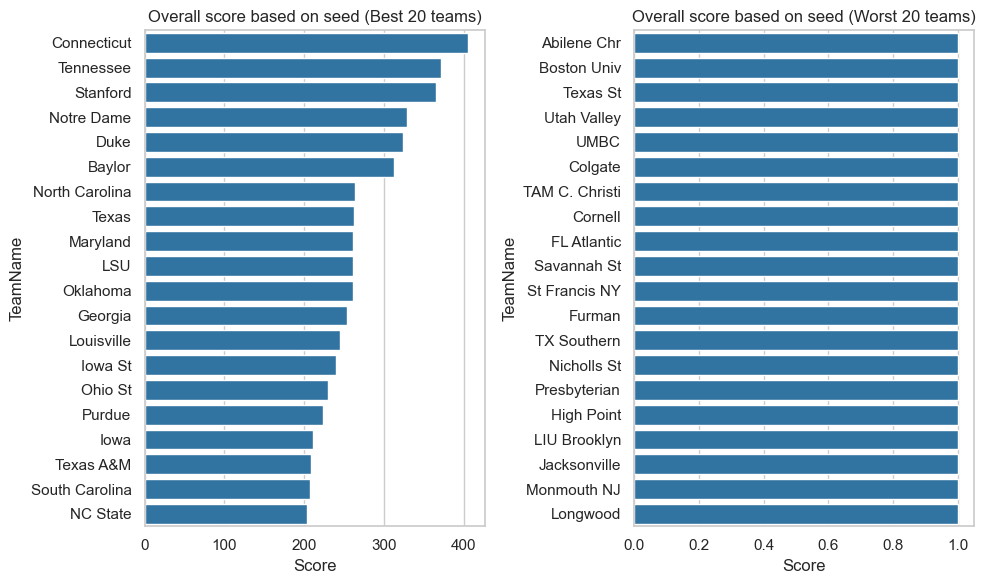

In [86]:
groupedscoreswbest = wseedsgrouped.groupby("TeamName").agg({
    "Score": "sum"
}).rename({"Score": "Overall"}).sort_values("Score", ascending=False).head(20)

groupedscoresworst = wseedsgrouped.groupby("TeamName").agg({
    "Score": "sum"
}).rename({"Score": "Overall"}).sort_values("Score", ascending=True).head(20)

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

sns.barplot(x=groupedscoreswbest.Score, y=groupedscoreswbest.index, ax=axs[0])
axs[0].set_title("Overall score based on seed (Best 20 teams)")

sns.barplot(x=groupedscoresworst.Score, y=groupedscoresworst.index, ax=axs[1])
axs[1].set_title("Overall score based on seed (Worst 20 teams)")

plt.tight_layout()
plt.show()

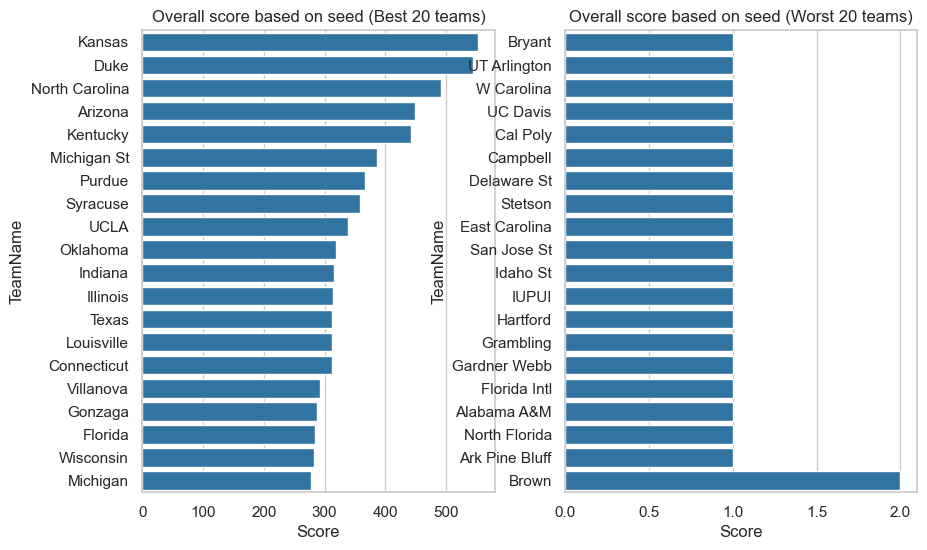

In [87]:
groupedscoresmbest = mgroupedseeds.groupby("TeamName").agg({
    "Score": "sum"
}).rename({"Score": "Overall"}).sort_values("Score", ascending=False).head(20)

groupedscoresmworst = mgroupedseeds.groupby("TeamName").agg({
    "Score": "sum"
}).rename({"Score": "Overall"}).sort_values("Score", ascending=True).head(20)

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

sns.barplot(x=groupedscoresmbest.Score, y=groupedscoresmbest.index, ax=axs[0])
axs[0].set_title("Overall score based on seed (Best 20 teams)")

sns.barplot(x=groupedscoresmworst.Score, y=groupedscoresmworst.index, ax=axs[1])
axs[1].set_title("Overall score based on seed (Worst 20 teams)")
plt.show()

So we can see best teams overall, based on weighted sum. Some teams appear in Men's and Women's teams. We can also see how particular States have its representant in this best overall scores. The worst teams depict less information, because probably a lot of teams, plays on once or there are new once. But still we can get some knowledge from it. Also it's some reminder that best teams, could be best a lot of years ago and now they don't get high seeds. But I think the weighted sum its good measure.

### There are better and worse regions based on overall seed score? 

In [149]:
wseedext

,Season,Seed,TeamID,ISeed,RegionEnc,DayZero_x,RegionName,DayZero_y,TeamName
0,1998,W01,3330,1,W,10/27/1997,East,10/27/1997,Old Dominion
1,1998,W02,3163,2,W,10/27/1997,East,10/27/1997,Connecticut
2,1998,W03,3112,3,W,10/27/1997,East,10/27/1997,Arizona
3,1998,W04,3301,4,W,10/27/1997,East,10/27/1997,NC State
4,1998,W05,3272,5,W,10/27/1997,East,10/27/1997,Memphis
...,...,...,...,...,...,...,...,...,...
1671,2024,Z12b,3435,12,Z,11/06/2023,Portland3,11/06/2023,Vanderbilt
1672,2024,Z13,3267,13,Z,11/06/2023,Portland3,11/06/2023,Marshall
1673,2024,Z14,3238,14,Z,11/06/2023,Portland3,11/06/2023,Jackson St
1674,2024,Z15,3263,15,Z,11/06/2023,Portland3,11/06/2023,Maine


In [171]:
wseedsgrouped.merge(wseedext[["TeamName", "RegionName"]], on="TeamName", how="left").groupby("RegionName").agg({
    "Count": "sum"
}).sort_values("Count", ascending=False).head(10)

,Count
RegionName,
East,1333
West,1292
Mideast,1269
Midwest,1257
Spokane,1201
OklahomaCity,1002
Greensboro,933
Bridgeport,890
Lexington,619


In [172]:
mgroupedseeds.merge(mseedext[["TeamName", "RegionName"]], on="TeamName", how="left").groupby("RegionName").agg({
    "Count": "sum"
}).sort_values("Count", ascending=False).head(10)

,Count
RegionName,
West,9255
Midwest,9194
East,9115
South,5765
Southeast,3738
Atlanta,569
Oakland,296
Austin,283
Syracuse,278


Due to different region names in different season, its kind of hard to asses the region strength.Probably if you have more domain knowledge, you can say more about it, and do some inference. So its of course depends on universities in particular region. So i cant directly say this.

### Basic stats for detailed informations

In [4]:
display(wregularseasondetailed.describe())
wtourneyseasondetailed.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,...,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000,79639.000000
mean,2017.310476,68.860759,3285.050867,71.711963,3286.594658,57.234370,0.051583,25.847537,58.980010,6.268876,...,17.913974,10.511119,15.515175,11.395447,22.441116,10.933688,16.745024,6.923831,3.434950,18.204184
std,4.531798,36.258086,104.022507,11.547894,105.457243,10.964583,0.258755,4.982451,7.975729,3.125925,...,6.469817,4.938106,6.632564,4.639725,4.939763,3.805204,5.597689,3.279905,3.666537,4.557235
min,2010.000000,0.000000,3101.000000,30.000000,3101.000000,11.000000,0.000000,9.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,2013.000000,35.000000,3196.000000,64.000000,3195.000000,50.000000,0.000000,22.000000,53.000000,4.000000,...,13.000000,7.000000,11.000000,8.000000,19.000000,8.000000,13.000000,5.000000,1.000000,15.000000
50%,2017.000000,72.000000,3283.000000,71.000000,3287.000000,57.000000,0.000000,25.000000,59.000000,6.000000,...,17.000000,10.000000,15.000000,11.000000,22.000000,11.000000,16.000000,7.000000,3.000000,18.000000
75%,2021.000000,101.000000,3376.000000,79.000000,3377.000000,64.000000,0.000000,29.000000,64.000000,8.000000,...,22.000000,14.000000,20.000000,14.000000,26.000000,13.000000,20.000000,9.000000,4.000000,21.000000
max,2025.000000,132.000000,3480.000000,140.000000,3480.000000,130.000000,5.000000,58.000000,113.000000,30.000000,...,80.000000,37.000000,52.000000,38.000000,53.000000,34.000000,49.000000,26.000000,42.000000,47.000000


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,...,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000
mean,2016.869128,140.583893,3283.829978,76.234899,3284.008949,59.439597,0.035794,27.844519,60.095078,6.120805,...,19.322148,9.847875,13.864653,11.326622,21.300895,11.426174,14.524609,6.643177,3.019016,17.828859
std,4.426542,4.026120,96.320725,11.681988,98.771071,11.449888,0.203152,5.225207,7.476197,3.193455,...,7.094248,4.949160,6.448402,4.845731,4.725625,3.852636,4.677620,3.117191,2.119783,4.205368
min,2010.000000,135.000000,3104.000000,48.000000,3101.000000,21.000000,0.000000,14.000000,40.000000,0.000000,...,3.000000,0.000000,0.000000,1.000000,8.000000,2.000000,2.000000,0.000000,0.000000,3.000000
25%,2013.000000,138.000000,3199.000000,69.000000,3205.500000,52.000000,0.000000,24.000000,55.000000,4.000000,...,14.000000,6.000000,9.000000,8.000000,18.000000,9.000000,11.000000,4.000000,1.000000,15.000000
50%,2017.000000,139.000000,3280.000000,75.000000,3278.000000,60.000000,0.000000,27.000000,60.000000,6.000000,...,19.000000,9.000000,13.000000,11.000000,21.000000,11.000000,14.000000,6.000000,3.000000,18.000000
75%,2021.000000,141.000000,3376.000000,84.000000,3375.000000,67.000000,0.000000,31.000000,65.000000,8.000000,...,24.000000,13.000000,18.000000,14.750000,24.000000,14.000000,18.000000,8.000000,4.000000,21.000000
max,2024.000000,155.000000,3462.000000,140.000000,3465.000000,100.000000,2.000000,59.000000,91.000000,18.000000,...,57.000000,26.000000,38.000000,29.000000,35.000000,29.000000,32.000000,22.000000,13.000000,31.000000


In [5]:
display(mregularseasondetailed.describe())
mtourneyseasondetailed.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,...,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000,116723.000000
mean,2014.051044,70.072462,1288.243422,75.859651,1283.044987,63.857732,0.068658,26.392099,55.746305,7.339085,...,20.138276,12.072488,17.736907,10.480668,21.632934,11.405867,13.737130,5.901031,3.144239,19.324709
std,6.464256,35.845605,105.298971,11.007412,104.764160,10.851210,0.305052,4.683480,7.461328,3.116574,...,6.064958,5.345290,7.085348,4.221941,4.519345,3.724047,4.536147,2.778302,2.628125,4.551727
min,2003.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000,10.000000,26.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,2009.000000,38.000000,1199.000000,68.000000,1192.000000,57.000000,0.000000,23.000000,51.000000,5.000000,...,16.000000,8.000000,13.000000,7.000000,19.000000,9.000000,11.000000,4.000000,1.000000,16.000000
50%,2014.000000,73.000000,1287.000000,75.000000,1282.000000,64.000000,0.000000,26.000000,55.000000,7.000000,...,20.000000,12.000000,17.000000,10.000000,21.000000,11.000000,13.000000,6.000000,3.000000,19.000000
75%,2020.000000,101.000000,1381.000000,83.000000,1374.000000,71.000000,0.000000,29.000000,60.000000,9.000000,...,24.000000,15.000000,22.000000,13.000000,25.000000,14.000000,17.000000,8.000000,4.000000,22.000000
max,2025.000000,132.000000,1480.000000,149.000000,1480.000000,144.000000,6.000000,57.000000,103.000000,26.000000,...,59.000000,48.000000,65.000000,36.000000,49.000000,31.000000,41.000000,22.000000,33.000000,45.000000


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,...,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.00000,1382.000000,1382.000000,1382.000000,1382.000000
mean,2013.301013,139.086831,1289.694645,75.431983,1293.123734,63.753980,0.066570,26.471780,55.782923,7.105644,...,20.735890,11.540521,16.465991,10.662084,21.339363,11.43343,11.934877,5.688857,2.945007,18.606368
std,6.315663,4.233378,102.879108,10.767408,105.822922,10.371463,0.284623,4.815375,7.368096,3.030926,...,5.793864,5.092428,6.620897,4.217751,4.486833,3.66791,3.897505,2.644274,2.026226,4.222270
min,2003.000000,134.000000,1101.000000,47.000000,1101.000000,29.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,0.000000,2.000000,1.000000,8.000000,2.00000,3.000000,0.000000,0.000000,7.000000
25%,2008.000000,136.000000,1211.000000,68.000000,1209.000000,56.250000,0.000000,23.000000,51.000000,5.000000,...,17.000000,8.000000,12.000000,8.000000,18.000000,9.00000,9.000000,4.000000,1.000000,16.000000
50%,2013.000000,137.000000,1277.000000,75.000000,1292.000000,63.000000,0.000000,26.000000,56.000000,7.000000,...,21.000000,11.000000,16.000000,10.000000,21.000000,11.00000,12.000000,6.000000,3.000000,18.000000
75%,2018.000000,139.000000,1392.250000,82.000000,1393.000000,71.000000,0.000000,30.000000,60.000000,9.000000,...,24.000000,15.000000,20.000000,13.000000,24.000000,14.00000,14.000000,7.000000,4.000000,21.000000
max,2024.000000,154.000000,1463.000000,121.000000,1463.000000,105.000000,2.000000,44.000000,84.000000,18.000000,...,42.000000,31.000000,45.000000,29.000000,42.000000,23.00000,27.000000,19.000000,13.000000,33.000000


We can see that stats are similar in tourney and regular season. But (i think due to bigger number of games in regular season) in regular season occur more extreme stats, like number of OT can be 6 or maximum number of points 149 (compared to 2 and 121).

In [6]:
wcolumns = ['Season', 'DayNum', 'WTeamID', 'WScore', 'WLoc', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 
            'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']

lcolumns = ['Season', 'DayNum','LTeamID', 'LScore', 'WLoc', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 
            'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']

wdictcolumns = {
    'WTeamID': 'TeamID', 
    'WScore' : 'Score', 
    'WLoc' : 'Loc', 
    'WFGM' : 'FGM', 
    'WFGA' : 'FGA', 
    'WFGM3' : 'FGM3', 
    'WFGA3' : 'FGA3', 
    'WFTM' : 'FTM', 
    'WFTA' : 'FTA', 
    'WOR' : 'OR', 
    'WDR' : 'DR', 
    'WAst' : 'Ast', 
    'WTO' : 'TO', 
    'WStl' : 'Stl', 
    'WBlk' : 'Blk', 
    'WPF' : 'PF',
}

ldictcolumns = {
    'LTeamID': 'TeamID', 
    'LScore' : 'Score', 
    'WLoc' : 'Loc', 
    'LFGM' : 'FGM', 
    'LFGA' : 'FGA', 
    'LFGM3' : 'FGM3', 
    'LFGA3' : 'FGA3', 
    'LFTM' : 'FTM', 
    'LFTA' : 'FTA', 
    'LOR' : 'OR', 
    'LDR' : 'DR', 
    'LAst' : 'Ast', 
    'LTO' : 'TO', 
    'LStl' : 'Stl', 
    'LBlk' : 'Blk', 
    'LPF' : 'PF',
}

In [7]:
wwregular = wregularseasondetailed[wcolumns]
wwtourney = wtourneyseasondetailed[wcolumns]

wmregular = mregularseasondetailed[wcolumns]
wmtourney = mtourneyseasondetailed[wcolumns]

lwregular = wregularseasondetailed[lcolumns]
lwtourney = wtourneyseasondetailed[lcolumns]

lmregular = mregularseasondetailed[lcolumns]
lmtourney = mtourneyseasondetailed[lcolumns]

In [8]:
lwregular['WLoc'] = lwregular.apply(transform_loc, axis=1)
lwtourney['WLoc'] = lwtourney.apply(transform_loc, axis=1)

lmregular['WLoc'] = lmregular.apply(transform_loc, axis=1)
lmtourney['WLoc'] = lmtourney.apply(transform_loc, axis=1)

C:\Users\urbii\AppData\Local\Temp\ipykernel_24084\1934646599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lwregular['WLoc'] = lwregular.apply(transform_loc, axis=1)
C:\Users\urbii\AppData\Local\Temp\ipykernel_24084\1934646599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lwtourney['WLoc'] = lwtourney.apply(transform_loc, axis=1)
C:\Users\urbii\AppData\Local\Temp\ipykernel_24084\1934646599.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [9]:
wwregular['Result'] = np.ones(wwregular.shape[0], dtype=int)
wwtourney['Result'] = np.ones(wwtourney.shape[0], dtype=int)

wwregular = wwregular.rename(columns=wdictcolumns)
wwtourney = wwtourney.rename(columns=wdictcolumns)

lwregular['Result'] = np.zeros(lwregular.shape[0], dtype=int)
lwtourney['Result'] = np.zeros(lwtourney.shape[0], dtype=int)

lwregular = lwregular.rename(columns=ldictcolumns)
lwtourney = lwtourney.rename(columns=ldictcolumns)


wmregular['Result'] = np.ones(wmregular.shape[0], dtype=int)
wmtourney['Result'] = np.ones(wmtourney.shape[0], dtype=int)

wmregular = wmregular.rename(columns=wdictcolumns)
wmtourney = wmtourney.rename(columns=wdictcolumns)

lmregular['Result'] = np.zeros(lmregular.shape[0], dtype=int)
lmtourney['Result'] = np.zeros(lmtourney.shape[0], dtype=int)

lmregular = lmregular.rename(columns=ldictcolumns)
lmtourney = lmtourney.rename(columns=ldictcolumns)


C:\Users\urbii\AppData\Local\Temp\ipykernel_24084\2294854686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wwregular['Result'] = np.ones(wwregular.shape[0], dtype=int)
C:\Users\urbii\AppData\Local\Temp\ipykernel_24084\2294854686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wwtourney['Result'] = np.ones(wwtourney.shape[0], dtype=int)
C:\Users\urbii\AppData\Local\Temp\ipykernel_24084\2294854686.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [10]:
mendetailedresults = pd.concat([wmregular, wmtourney, lmregular, lmtourney]).sort_values(["Season"], ignore_index=True)
womendetailedresults = pd.concat([wwregular, wwtourney, lwregular, lwtourney]).sort_values(["Season"], ignore_index=True)

In [11]:
display(mendetailedresults.head(5))
display(womendetailedresults.head(5))

,Season,DayNum,TeamID,Score,Loc,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Result
0,2003,14,1166,82,H,33,61,8,19,8,14,9,23,21,17,14,5,18,1
1,2003,14,1161,81,H,22,48,5,12,32,43,16,32,13,24,5,3,19,1
2,2003,14,1156,78,N,27,46,10,18,14,24,8,25,18,15,2,6,18,1
3,2003,14,1125,83,N,30,70,11,31,12,15,15,18,22,16,18,5,21,1
4,2003,13,1323,76,H,25,56,10,23,16,23,8,35,18,13,14,19,13,1


,Season,DayNum,TeamID,Score,Loc,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Result
0,2010,11,3173,77,H,26,65,8,22,17,33,19,31,14,22,11,7,22,1
1,2010,11,3168,79,A,26,61,7,15,20,26,13,14,11,15,9,2,21,1
2,2010,11,3166,77,H,27,68,13,31,10,16,20,33,19,17,7,2,17,1
3,2010,11,3162,79,H,33,57,7,18,6,7,10,20,15,14,8,3,21,1
4,2010,11,3161,72,H,23,54,4,13,22,33,16,30,12,21,8,2,23,1


### Which teams had the largest number of wins?

In [15]:
mendetailedresults.groupby(["Season", "TeamID"]).agg({"Result": "sum"}).sort_values("Result", ascending=False).head(10)

,,Result
Season,TeamID,
2008,1272,38
2012,1246,38
2015,1246,38
2005,1228,37
2017,1211,37
2024,1163,37
2008,1242,36
2018,1437,36
2014,1196,36


In [16]:
womendetailedresults.groupby(["Season", "TeamID"]).agg({"Result": "sum"}).sort_values("Result", ascending=False).head(10)

,,Result
Season,TeamID,
2014,3163,40
2012,3124,39
2016,3163,38
2024,3376,38
2015,3163,38
2010,3163,38
2018,3280,37
2014,3323,37
2019,3124,37


As we can see some teams are more frequently in this set. This could convey some informations. Maybe in the future the number of wins in current season and for example in previous it will be added to a set of features.